In [1]:
!pip install kagglehub --quiet

import kagglehub
import os

# Download the Animals-10 dataset
path = kagglehub.dataset_download("alessiocorrado99/animals10")
dataset_path = os.path.join(path, "raw-img")

print("✅ Path to dataset files:", dataset_path)


✅ Path to dataset files: /kaggle/input/animals10/raw-img


In [2]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import zipfile


In [4]:
# View original class names and their indices
print("Original class names and indices:")
print(train_data.class_indices)


Original class names and indices:
{'cane': 0, 'cavallo': 1, 'elefante': 2, 'farfalla': 3, 'gallina': 4, 'gatto': 5, 'mucca': 6, 'pecora': 7, 'ragno': 8, 'scoiattolo': 9}


In [5]:
# Define mapping from original to English class names
class_name_mapping = {
    'cane': 'Dog',
    'cavallo': 'Horse',
    'elefante': 'Elephant',
    'farfalla': 'Butterfly',
    'gallina': 'Chicken',
    'gatto': 'Cat',
    'mucca': 'Cow',
    'pecora': 'Sheep',
    'ragno': 'Spider',
    'scoiattolo': 'Squirrel'
}

# Apply the mapping
original_class_names = list(train_data.class_indices.keys())
english_class_names = [class_name_mapping[orig] for orig in original_class_names]

print("✅ Renamed class names to English:")
print(english_class_names)

✅ Renamed class names to English:
['Dog', 'Horse', 'Elephant', 'Butterfly', 'Chicken', 'Cat', 'Cow', 'Sheep', 'Spider', 'Squirrel']


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

# Data generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

# Test data (same source for simplicity)
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.
Found 26179 images belonging to 10 classes.


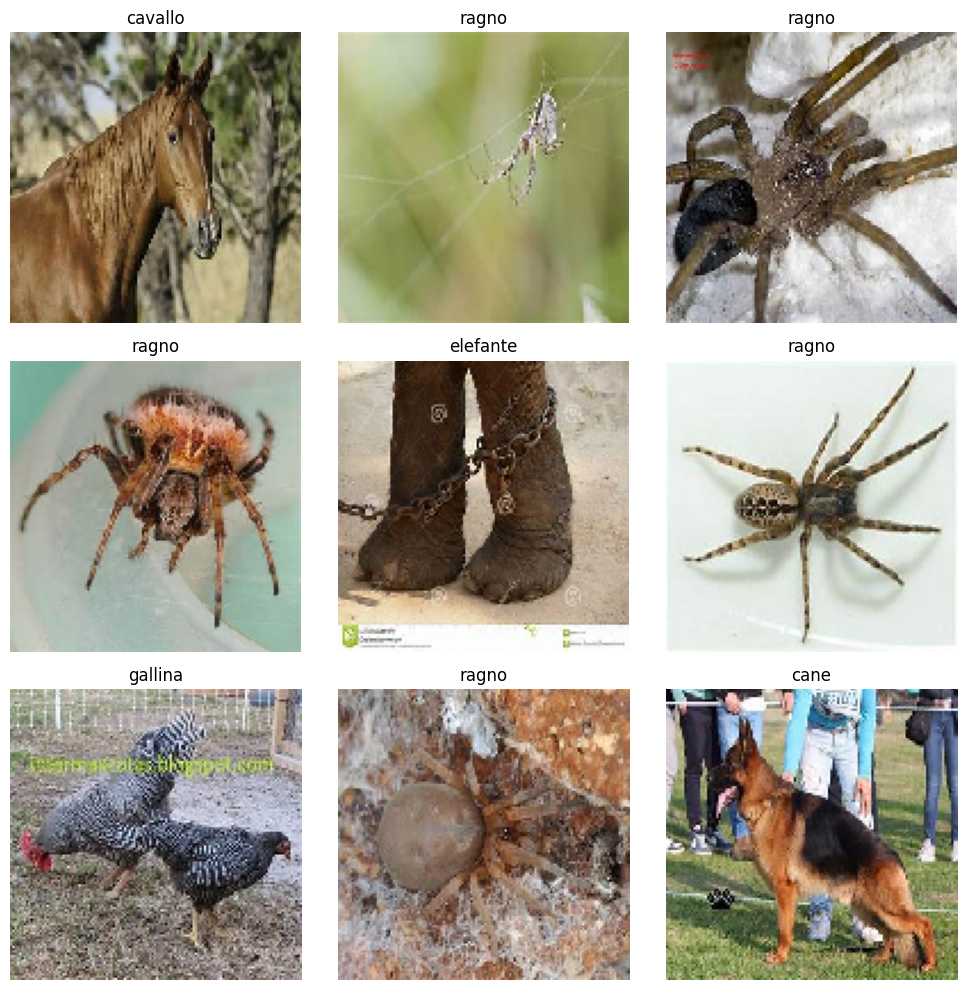

In [7]:
import matplotlib.pyplot as plt
import numpy as np

class_names = list(train_data.class_indices.keys())

images, labels = next(train_data)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    label_index = np.argmax(labels[i])
    plt.title(class_names[label_index])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [8]:
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model = models.Sequential([
    layers.InputLayer(input_shape=(128, 128, 3)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,518,602 (24.87 MB)

 Trainable params: 6,518,602 (24.87 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=[early_stop]
)



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 697s 1s/step - accuracy: 0.2866 - loss: 2.0165 - val_accuracy: 0.5088 - val_loss: 1.4415
Epoch 2/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 725s 1s/step - accuracy: 0.5040 - loss: 1.4464 - val_accuracy: 0.5948 - val_loss: 1.1926
Epoch 3/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 682s 1s/step - accuracy: 0.6055 - loss: 1.1660 - val_accuracy: 0.6483 - val_loss: 1.0555
Epoch 4/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 686s 1s/step - accuracy: 0.6771 - loss: 0.9452 - val_accuracy: 0.6514 - val_loss: 1.0170
Epoch 5/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 732s 1s/step - accuracy: 0.7410 - loss: 0.7557 - val_accuracy: 0.6865 - val_loss: 0.9741
Epoch 6/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 697s 1s/step - accuracy: 0.7903 - loss: 0.6145 - val_accuracy: 0.6850 - val_loss: 1.0250
Epoch 7/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 696s 1s/step - accuracy: 0.8353 - loss: 0.4726 - val_accuracy: 0.6951 - val_loss: 1.0624
Epoch 8/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 698s 1s/step - accuracy: 0.8721 - loss: 0.3773 - val_accu

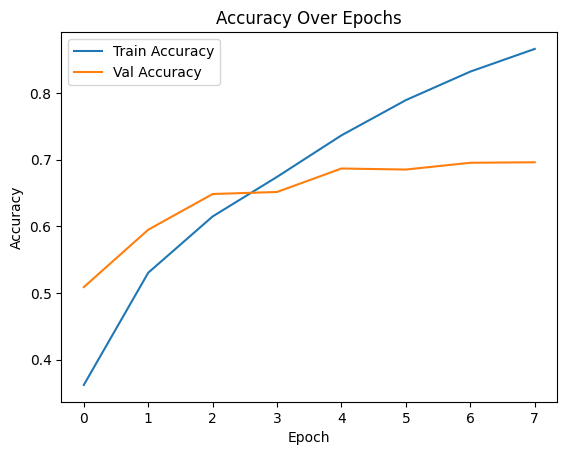

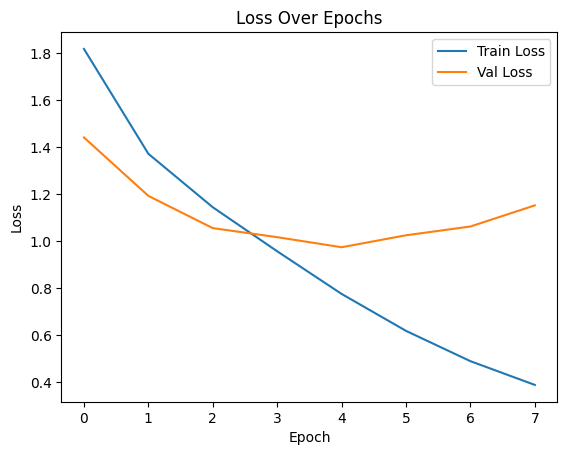

In [10]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [11]:
loss, acc = model.evaluate(test_data)
print(f"✅ Test Accuracy: {acc:.2f}")


819/819 ━━━━━━━━━━━━━━━━━━━━ 248s 302ms/step - accuracy: 0.8268 - loss: 0.5846
✅ Test Accuracy: 0.83


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


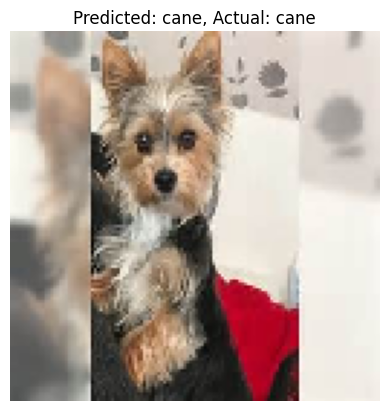

In [12]:
# Get one image and true label from test set
image_batch, label_batch = next(test_data)
image = image_batch[0]
true_label = np.argmax(label_batch[0])

# Predict
prediction = model.predict(np.expand_dims(image, axis=0))
predicted_class = np.argmax(prediction)

# Show image with prediction
plt.imshow(image)
plt.axis('off')
plt.title(f"Predicted: {class_names[predicted_class]}, Actual: {class_names[true_label]}")
plt.show()


In [14]:
from google.colab import files
uploaded = files.upload()


Saving spider.jpeg to spider.jpeg


In [16]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Replace with your uploaded file name
image_path = "/content/spider.jpeg"

# Load and resize image
img = image.load_img(image_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


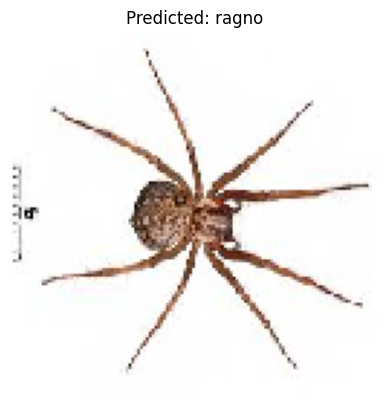

In [17]:
# Predict
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Show image and prediction
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {class_names[predicted_class]}")
plt.show()


In [18]:
import numpy as np

# Get true labels
true_labels = test_data.classes

# Get predictions
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)

# Get class names
class_names = list(test_data.class_indices.keys())


819/819 ━━━━━━━━━━━━━━━━━━━━ 251s 306ms/step


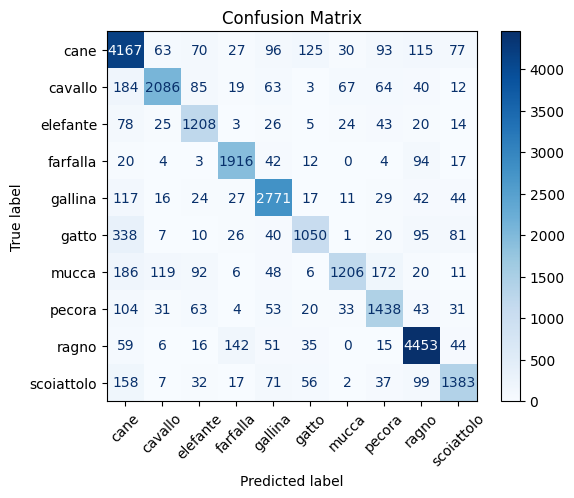

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=45, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
